# Unsupervised Machine Learning Models

In [1]:
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.abspath(".."))

from src.evaluation import calculate_ari
from src.evaluation import transition_matrix
from src.models import fit_gmm, fit_hmm
from src.plotting import plot_PCA
from src.plotting import plot_time_series

%store -r dataset
X = dataset[0]
z_true = dataset[1]
difficulty = dataset[2]
X_pca = dataset[3]

# Gaussian Mixture Model (GMM)

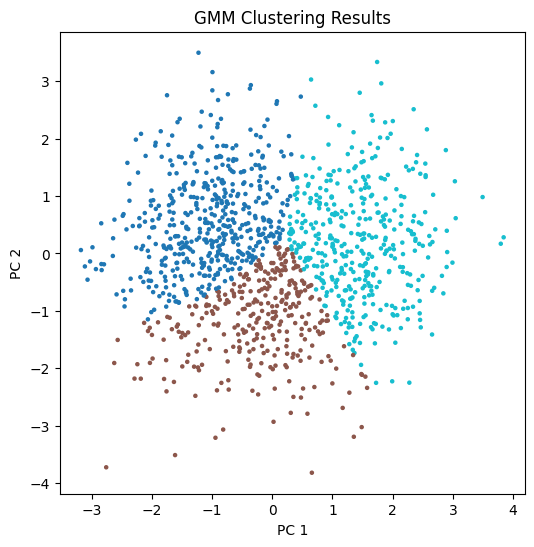

In [2]:
# Fit GMM to PCA-transformed data

gmm, z_gmm = fit_gmm(X_pca)

plot_PCA(X_pca, z_gmm, 'GMM Clustering Results', 4, difficulty,'tab10')

In [3]:
ari_gmm = calculate_ari(z_true, z_gmm, 'GMM')

GMM ARI: 0.425


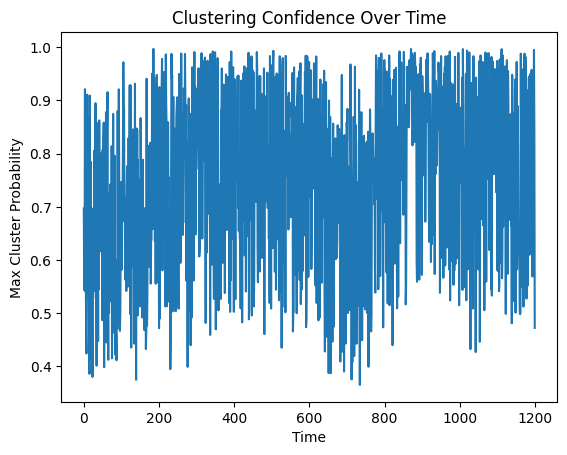

In [4]:
# Plot clustering confidence over time

probs = gmm.predict_proba(X_pca)

max_prob = probs.max(axis=1)
plt.plot(max_prob)
plt.xlabel('Time')
plt.ylabel('Max Cluster Probability')
plt.title('Clustering Confidence Over Time')
plt.show()

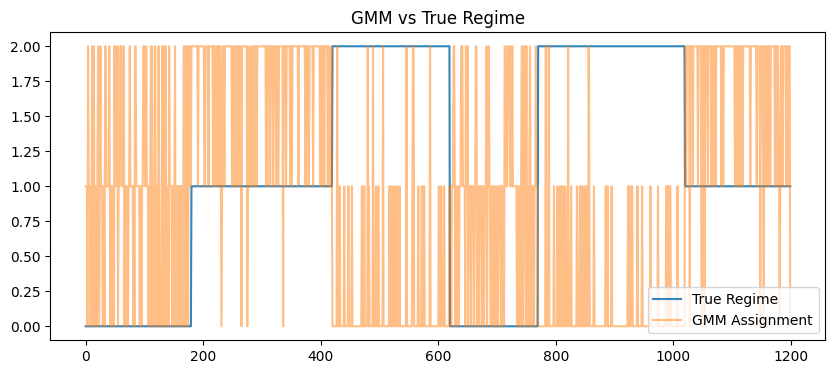

In [5]:
plot_time_series(z_gmm, z_true, 'GMM', 4, difficulty)

# Hidden Markov Model (HMM)

In [6]:
%store -r dataset
dataset[1] = z_true
dataset[2] = X_pca

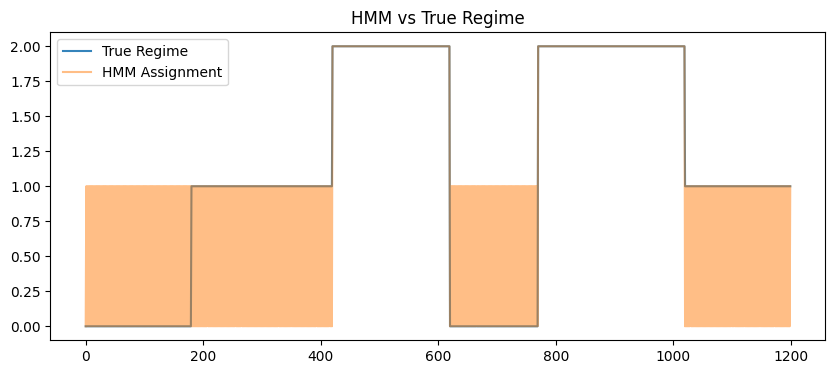

In [7]:
hmm, z_hmm = fit_hmm(X_pca, 200, 1.0)
plot_time_series(z_hmm, z_true, 'HMM', 4, difficulty)

In our experiments, unconstrained HMMs occasionally collapse into oscillatory state sequences, where two states alternate deterministically. This behavior reflects overfitting to pointwise noise and highlights the need for transition regularization in regime-switching models. 
If the data within a regime is noisy, a flexible regime-switching model may overfit and falsely infer rapid switching.

In [8]:
calculate_ari(z_true, z_hmm, 'HMM')

HMM ARI: 0.563


0.5625580972339598

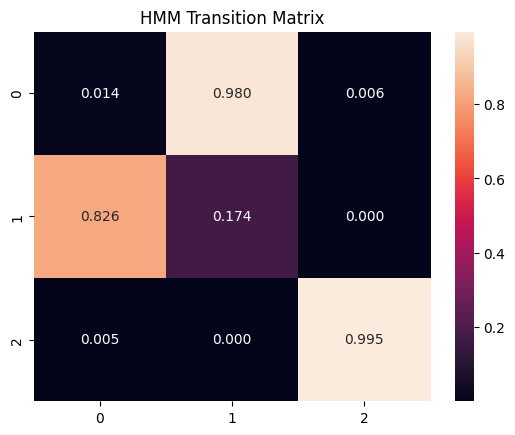

In [9]:
transition_matrix(hmm.transmat_, 'HMM', 4, difficulty)

# Adjusted HMM (with Transmat Prior)

Without transition regularization, HMMs may trade regime persistence for higher likelihood by rapidly alternating between similar states.

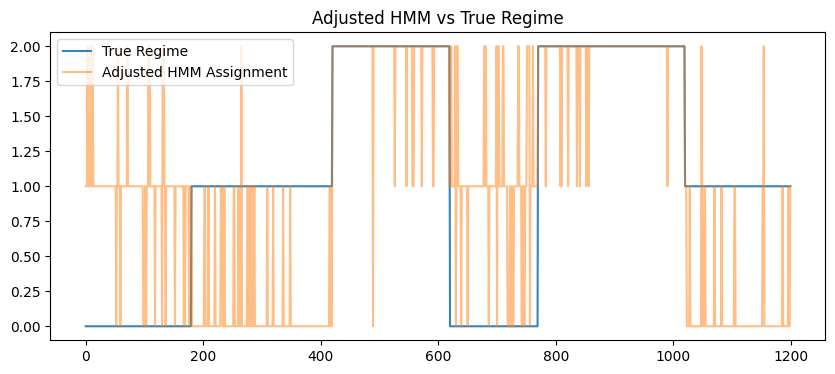

In [10]:
adj_hmm, z_adj_hmm = fit_hmm(X_pca, 2000, 100.0)

plot_time_series(z_adj_hmm, z_true, 'Adjusted HMM', 4, difficulty)

In [11]:
ari_adj_hmm = calculate_ari(z_true, z_adj_hmm, 'Adjusted HMM')

Adjusted HMM ARI: 0.730


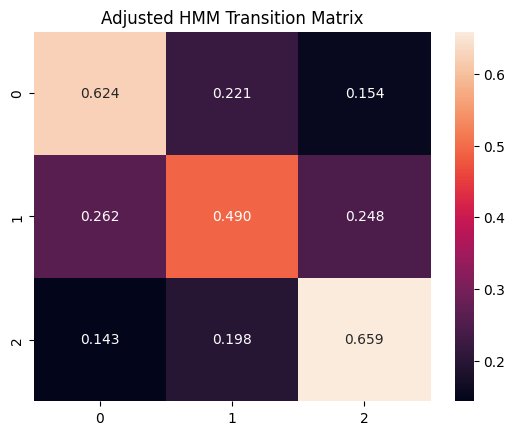

In [12]:
transition_matrix(adj_hmm.transmat_, 'Adjusted HMM', 4, difficulty)

We study latent regime detection in multivariate time series using synthetic data with controlled regime shifts. Geometry-based methods (KMeans, GMM) recover significant structure but lack temporal coherence. A Hidden Markov Model introduces regime persistence, though we observe pathological oscillations without transition regularization, highlighting the bias–variance tradeoff inherent in regime-switching models.

In [13]:
%store -r results

results.extend([ari_gmm, z_gmm, ari_adj_hmm, z_adj_hmm])
%store results
del results

Stored 'results' (list)
